<a href="https://colab.research.google.com/github/manuelarturomezagarcia/meni/blob/main/Copia_de_Copia_de_Copia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(f"¿GPU disponible?: {torch.cuda.is_available()}")
print(f"Dispositivo actual: {torch.cuda.get_device_name(0)}")

¿GPU disponible?: True
Dispositivo actual: Tesla T4


In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
data_yaml = """\
path: /content
train: imagenes/train
val: imagenes/vals

names:
  0: arma
"""

with open('/content/data.yaml', 'w') as f:
    f.write(data_yaml)

print("✅ Archivo 'data.yaml' creado correctamente.")


✅ Archivo 'data.yaml' creado correctamente.


In [19]:
import os
import random
import shutil
from glob import glob

# Crear carpetas de validación si no existen
os.makedirs('/content/imagenes/vals', exist_ok=True)
os.makedirs('/content/labels/vals', exist_ok=True)

# Obtener todas las imágenes del train
image_paths = glob('/content/imagenes/train/*.jpg') + glob('/content/imagenes/train/*.png')
random.shuffle(image_paths)

# Usar el 20% para validación
val_count = max(1, int(len(image_paths) * 0.10))  # al menos 1
val_images = image_paths[:val_count]

# Mover imágenes y sus etiquetas
for img_path in val_images:
    file_name = os.path.basename(img_path)
    txt_name = os.path.splitext(file_name)[0] + '.txt'

    src_img = f"/content/imagenes/train/{file_name}"
    src_lbl = f"/content/labels/train/{txt_name}"

    dst_img = f"/content/imagenes/vals/{file_name}"
    dst_lbl = f"/content/labels/vals/{txt_name}"

    # Mover archivos
    if os.path.exists(src_img):
        shutil.move(src_img, dst_img)
    if os.path.exists(src_lbl):
        shutil.move(src_lbl, dst_lbl)

print(f"✅ Se movieron {val_count} imágenes y etiquetas a 'vals'.")


✅ Se movieron 1 imágenes y etiquetas a 'vals'.


In [20]:
data_yaml = """\
train: /content/dataset/train/images
val: /content/dataset/valid/images

nc: 1
names: ['arma']
"""

with open('/content/dataset/data.yaml', 'w') as f:
    f.write(data_yaml)

print("✅ Archivo 'data.yaml' creado correctamente.")


✅ Archivo 'data.yaml' creado correctamente.


In [21]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # o 'yolov8s.pt', etc.
model.train(data='/content/dataset/data.yaml', epochs=50, imgsz=640)


Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

train: Scanning /content/dataset/train/labels.cache... 37 images, 20 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 489.0±382.7 MB/s, size: 43.5 KB)


val: Scanning /content/dataset/valid/labels.cache... 8 images, 8 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.1G      1.125      2.938       1.64         18        640: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         16          9    0.00187          1     0.0618     0.0378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50       2.1G     0.7963      2.737      1.353         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         16          9    0.00187          1      0.501      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.1G     0.8231      2.266      1.394         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all         16          9    0.00187          1       0.43      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.1G     0.8915      2.277      1.402         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         16          9    0.00187          1      0.171      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.1G      0.817      2.003      1.352         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]

                   all         16          9    0.00167      0.889     0.0722     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.1G     0.8247      1.975      1.417         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         16          9    0.00167      0.889      0.184      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.1G     0.8355      1.997       1.38         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         16          9    0.00187          1      0.405      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.1G      0.943      2.101      1.502         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         16          9    0.00265          1      0.598       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.1G     0.8547      1.806      1.348         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.70it/s]

                   all         16          9    0.00256          1      0.462      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.1G     0.7883       1.93      1.339         15        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         16          9    0.00187          1      0.288      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.1G     0.8654      1.853      1.417         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all         16          9      0.797      0.437      0.636      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.1G     0.8711      1.813      1.397         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

                   all         16          9      0.736      0.556      0.618      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.1G     0.8326      1.903       1.39         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         16          9      0.517      0.556      0.619      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.1G     0.9919       1.88      1.471         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         16          9      0.899      0.444      0.648       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.11G     0.8116       1.79      1.399         11        640: 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         16          9       0.34      0.778      0.381      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.11G     0.7711      1.589      1.295         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         16          9      0.266      0.778      0.251      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.11G      0.804      1.619      1.363         21        640: 100%|██████████| 4/4 [00:00<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         16          9      0.255      0.556      0.239      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.12G     0.7959      1.457      1.252         16        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.47it/s]

                   all         16          9      0.411      0.222      0.271     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.12G     0.8113      1.561      1.329         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         16          9      0.588       0.32      0.351      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.12G     0.8557      1.559      1.407         20        640: 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         16          9      0.362      0.556      0.393      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.12G     0.8937      1.776      1.428         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         16          9      0.324      0.778      0.302       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.14G     0.8292      1.527      1.381         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


                   all         16          9      0.253      0.667       0.25     0.0741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.14G     0.8476      1.619      1.349         15        640: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]

                   all         16          9      0.241      0.444      0.252     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.14G     0.7761       1.58      1.382         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all         16          9      0.182      0.556      0.216     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.16G     0.8927      1.521      1.432         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         16          9       0.47      0.444      0.342      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.17G     0.8559      1.536      1.422         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         16          9      0.365       0.64      0.421      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.18G     0.8559      1.537      1.356         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all         16          9      0.349      0.778      0.449      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.18G     0.9892      1.593      1.536         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all         16          9      0.382      0.556      0.357      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.18G     0.8629       1.39      1.318         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         16          9      0.227      0.393      0.201      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.18G     0.8256      1.493       1.35         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         16          9      0.202      0.778      0.221     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.18G     0.7862      1.301      1.255         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.51it/s]

                   all         16          9      0.289      0.556      0.324      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.18G     0.7449      1.286      1.244         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

                   all         16          9      0.407      0.556       0.38      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.18G     0.7224      1.253      1.298         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all         16          9      0.287      0.667      0.337      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.18G     0.6448      1.247      1.264         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all         16          9      0.276      0.667      0.272      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.18G     0.8063      1.322      1.341         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         16          9      0.238      0.778      0.279     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.18G     0.7446      1.238      1.266         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         16          9      0.146      0.444     0.0995     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.18G     0.7334      1.344       1.28          9        640: 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.89it/s]

                   all         16          9      0.228      0.593       0.18     0.0822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.18G     0.8208      1.297      1.336         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]

                   all         16          9      0.238      0.667      0.194     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.18G      0.823      1.377      1.344         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         16          9      0.377      0.556      0.277       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.18G        0.6       1.16      1.164         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         16          9      0.375      0.556      0.312      0.155


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.18G     0.7373      2.225      1.416          4        640: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         16          9       0.43      0.556      0.322      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.18G     0.5805      1.636      1.275          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.79it/s]

                   all         16          9      0.604      0.556      0.357      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.18G     0.6371      1.569      1.317          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         16          9      0.502      0.556      0.396      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.18G     0.5894      1.528      1.301          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         16          9      0.685      0.556      0.437      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.18G     0.5451      1.465      1.202          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         16          9      0.675      0.556      0.438      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.18G     0.5407      1.472      1.239          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.52it/s]

                   all         16          9      0.678      0.556      0.457      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.18G     0.5089      1.415      1.168          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


                   all         16          9      0.684      0.556      0.484      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.18G      0.614      1.416      1.261          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all         16          9      0.686      0.556      0.525      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.18G     0.4664      1.334       1.14          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]

                   all         16          9      0.695      0.556      0.548      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.18G     0.4488      1.382      1.199          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all         16          9      0.706      0.556      0.554       0.42



50 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]


                   all         16          9      0.686      0.556      0.526      0.432
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb9abfc7290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [22]:
import pandas as pd

# Leer el archivo (ajustamos el nombre por si tiene espacios o paréntesis)
df = pd.read_csv('/content/atributos(Sheet1).csv')

# Mostrar las primeras filas para verificar
df.head()


filename   L   A  M1  M2  M3  C1  C2  C3  C4
0      arma1.jpg  25   5   1   0   0   1   0   0   0
1     fusil2.jpg  80  75   1   0   0   0   0   1   0
2  cuchillo3.jpg  12   8   1   0   1   0   0   0   1

In [23]:
# Función de clasificación personalizada
def clasificar_arma(row):
    L, A = row['L'], row['A']
    C1, C2, C3, C4 = row['C1'], row['C2'], row['C3'], row['C4']
    tipo = "Desconocido"
    peligro = "No definido"

    if C4 == 1:
        if A >= 15:
            tipo = "Machete"
        elif A <= 10:
            tipo = "Cuchillo"
        peligro = "Peligro Bajo"
    elif C1 == 1:
        if A >= 20 and L <= 30:
            tipo = "Pistola"
        peligro = "Peligro Bajo"
    elif C2 == 1:
        if 30 <= A <= 35:
            tipo = "Subfusil"
        elif A >= 40 and 40 <= L <= 60:
            tipo = "Carabina"
        elif A >= 15:
            tipo = "Machete"
        peligro = "Peligro Muy Alto"
    elif C3 == 1 and L > 75:
        if A > 70:
            tipo = "Francotirador"
        elif A <= 61 and A > 31:
            tipo = "Fusil de Asalto"
        elif A <= 61:
            tipo = "Fusil Tirador"
        peligro = "Peligro Alto"

    return pd.Series([tipo, peligro])

# Aplicar
df[['tipo_arma', 'nivel_peligro']] = df.apply(clasificar_arma, axis=1)

# Mostrar resultado
df.head()


filename   L   A  M1  M2  M3  C1  C2  C3  C4      tipo_arma  \
0      arma1.jpg  25   5   1   0   0   1   0   0   0    Desconocido   
1     fusil2.jpg  80  75   1   0   0   0   0   1   0  Francotirador   
2  cuchillo3.jpg  12   8   1   0   1   0   0   0   1       Cuchillo   

  nivel_peligro  
0  Peligro Bajo  
1  Peligro Alto  
2  Peligro Bajo

In [24]:
df.to_csv('/content/clasificacion_armas_final.csv', index=False)
print("✅ Clasificación completada. Archivo guardado como 'clasificacion_armas_final.csv'.")


✅ Clasificación completada. Archivo guardado como 'clasificacion_armas_final.csv'.


In [25]:
import os
os.makedirs('/content/resultados', exist_ok=True)



image 1/1 /content/dataset/valid/images/-72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg: 640x640 1 arma, 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


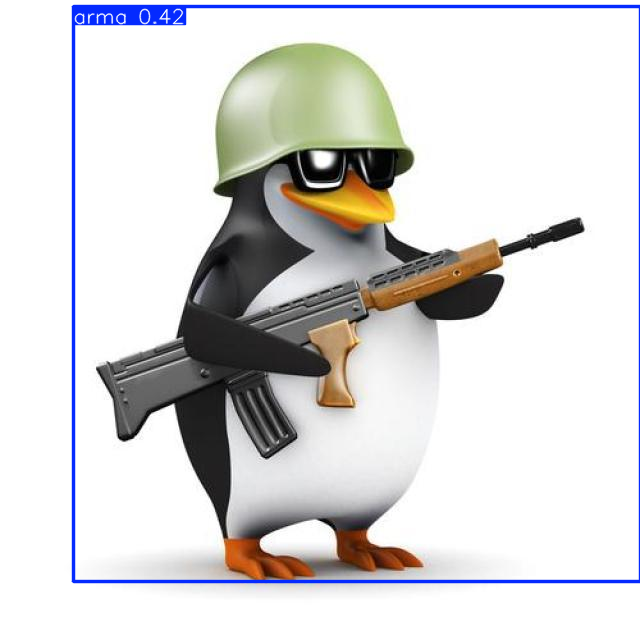

In [28]:
results = model('/content/dataset/valid/images/-72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg')

# Mostrar el resultado de la primera imagen de la lista
results[0].show()


In [29]:
results[0].save(filename='/content/resultados/-72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg')


'/content/resultados/-72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg'

🔎 Procesando: -53_jpeg_jpg.rf.819b5556551f1bd963228c173fe171c2.jpg

image 1/1 /content/dataset/valid/images/-53_jpeg_jpg.rf.819b5556551f1bd963228c173fe171c2.jpg: 640x640 1 arma, 13.4ms
Speed: 2.5ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


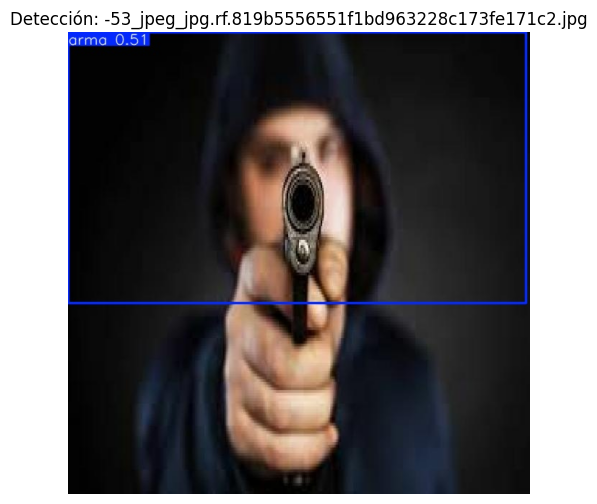

🔎 Procesando: -72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg

image 1/1 /content/dataset/valid/images/-72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg: 640x640 1 arma, 10.4ms
Speed: 3.6ms preprocess, 10.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


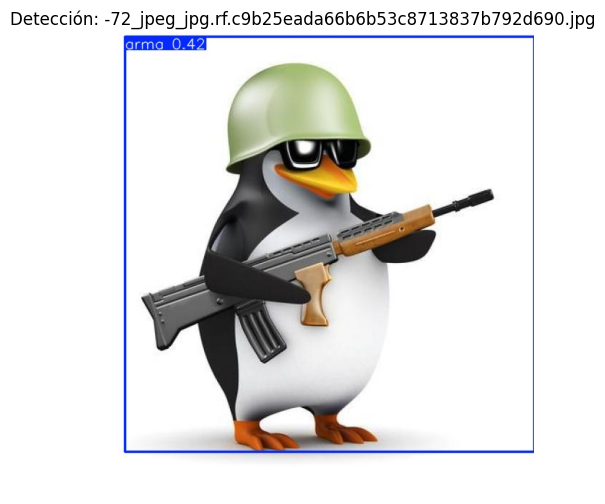

🔎 Procesando: -31_jpeg_jpg.rf.ae3937cdfb0601840310e33e2bdca4c9.jpg

image 1/1 /content/dataset/valid/images/-31_jpeg_jpg.rf.ae3937cdfb0601840310e33e2bdca4c9.jpg: 640x640 1 arma, 12.5ms
Speed: 2.6ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


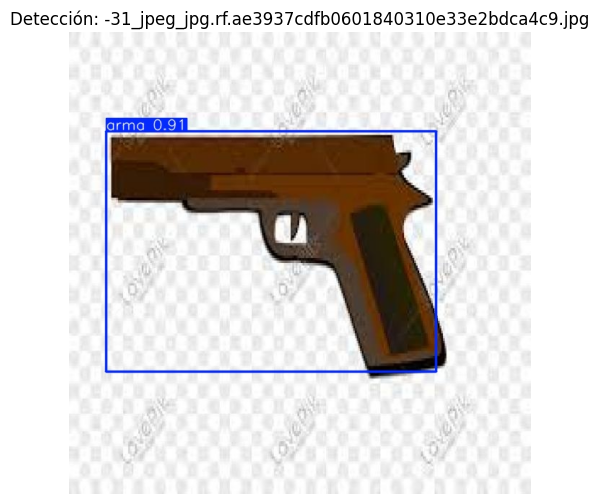

🔎 Procesando: -67_jpeg_jpg.rf.e02ba38097089b730e9576aad84085dd.jpg

image 1/1 /content/dataset/valid/images/-67_jpeg_jpg.rf.e02ba38097089b730e9576aad84085dd.jpg: 640x640 1 arma, 9.3ms
Speed: 2.4ms preprocess, 9.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


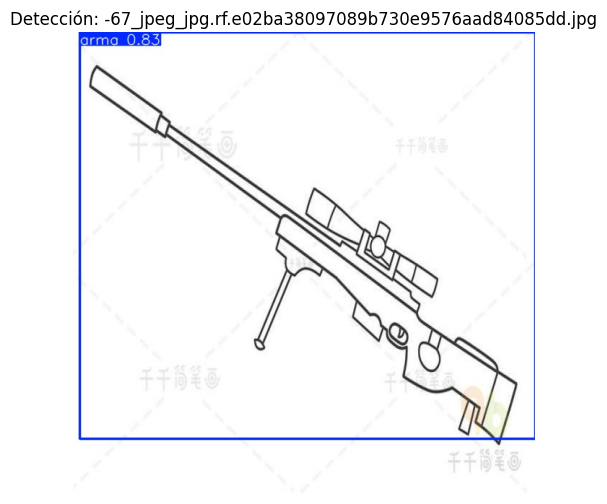

🔎 Procesando: -32_jpeg_jpg.rf.7320a90be0c7c8a807260fee6707dbcd.jpg

image 1/1 /content/dataset/valid/images/-32_jpeg_jpg.rf.7320a90be0c7c8a807260fee6707dbcd.jpg: 640x640 1 arma, 9.8ms
Speed: 2.5ms preprocess, 9.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


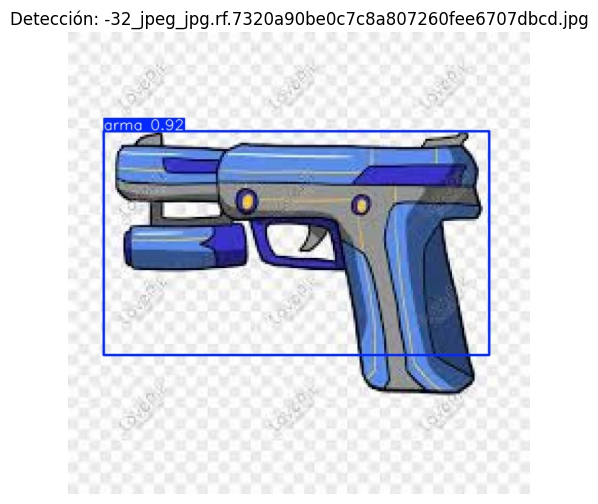

In [30]:
import cv2
import matplotlib.pyplot as plt
from glob import glob

# Carpeta de imágenes a usar
image_paths = glob('/content/dataset/valid/images/*.jpg')  # o *.png según tu dataset

# Crear carpeta para guardar resultados
import os
os.makedirs('/content/resultados', exist_ok=True)

# Visor en bucle
for path in image_paths[:5]:  # ← cambia el número para ver más imágenes
    print(f"🔎 Procesando: {os.path.basename(path)}")

    results = model(path)
    results[0].save(filename=f"/content/resultados/{os.path.basename(path)}")

    # Cargar y mostrar
    img_result = cv2.imread(f"/content/resultados/{os.path.basename(path)}")
    img_rgb = cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Detección: {os.path.basename(path)}")
    plt.show()


In [31]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Modelo base
model.train(data='/content/dataset/data.yaml', epochs=50, imgsz=640)


Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

train: Scanning /content/dataset/train/labels.cache... 37 images, 20 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 398.1±518.8 MB/s, size: 43.5 KB)


val: Scanning /content/dataset/valid/labels.cache... 8 images, 8 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.16G      1.125      2.938       1.64         18        640: 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         16          9    0.00187          1     0.0618     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.16G     0.7963      2.737      1.353         18        640: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         16          9    0.00187          1      0.501      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.16G     0.8231      2.266      1.394         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.66it/s]

                   all         16          9    0.00187          1       0.43      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.16G     0.8915      2.277      1.402         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         16          9    0.00187          1      0.171      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.16G      0.817      2.003      1.352         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         16          9    0.00167      0.889     0.0722     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.16G     0.8247      1.975      1.417         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         16          9    0.00167      0.889      0.184      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.16G     0.8355      1.997       1.38         10        640: 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all         16          9    0.00187          1      0.405      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.16G      0.943      2.101      1.502         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all         16          9    0.00265          1      0.598       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.16G     0.8547      1.806      1.348         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         16          9    0.00256          1      0.462      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.16G     0.7883       1.93      1.339         15        640: 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         16          9    0.00187          1      0.288      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.16G     0.8654      1.853      1.417         16        640: 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         16          9      0.797      0.437      0.636      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.16G     0.8711      1.813      1.397         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]


                   all         16          9      0.736      0.556      0.618      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.16G     0.8326      1.903       1.39         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.04it/s]

                   all         16          9      0.517      0.556      0.619      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.16G     0.9919       1.88      1.471         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         16          9      0.899      0.444      0.648       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.16G     0.8116       1.79      1.399         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         16          9       0.34      0.778      0.381      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.16G     0.7711      1.589      1.295         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all         16          9      0.266      0.778      0.251      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.16G      0.804      1.619      1.363         21        640: 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         16          9      0.255      0.556      0.239      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.16G     0.7959      1.457      1.252         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.81it/s]

                   all         16          9      0.411      0.222      0.271     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.16G     0.8113      1.561      1.329         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.78it/s]

                   all         16          9      0.588       0.32      0.351      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.17G     0.8557      1.559      1.407         20        640: 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         16          9      0.362      0.556      0.393      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.17G     0.8937      1.776      1.428         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         16          9      0.324      0.778      0.302       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.19G     0.8292      1.527      1.381         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


                   all         16          9      0.253      0.667       0.25     0.0741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.19G     0.8476      1.619      1.349         15        640: 100%|██████████| 4/4 [00:00<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         16          9      0.241      0.444      0.252     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.19G     0.7761       1.58      1.382         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         16          9      0.182      0.556      0.216     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.19G     0.8927      1.521      1.432         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         16          9       0.47      0.444      0.342      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.21G     0.8559      1.536      1.422         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]

                   all         16          9      0.365       0.64      0.421      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.21G     0.8559      1.537      1.356         15        640: 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all         16          9      0.349      0.778      0.449      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.21G     0.9892      1.593      1.536         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         16          9      0.382      0.556      0.357      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.21G     0.8629       1.39      1.318         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         16          9      0.227      0.393      0.201      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.21G     0.8256      1.493       1.35         19        640: 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         16          9      0.202      0.778      0.221     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.21G     0.7862      1.301      1.255         19        640: 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]

                   all         16          9      0.289      0.556      0.324      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.21G     0.7449      1.286      1.244         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.62it/s]

                   all         16          9      0.407      0.556       0.38      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.21G     0.7224      1.253      1.298         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all         16          9      0.287      0.667      0.337      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.21G     0.6448      1.247      1.264         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         16          9      0.276      0.667      0.272      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.21G     0.8063      1.322      1.341         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         16          9      0.238      0.778      0.279     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.21G     0.7446      1.238      1.266         14        640: 100%|██████████| 4/4 [00:00<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         16          9      0.146      0.444     0.0995     0.0426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.21G     0.7334      1.344       1.28          9        640: 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.85it/s]

                   all         16          9      0.228      0.593       0.18     0.0822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.21G     0.8208      1.297      1.336         17        640: 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.34it/s]

                   all         16          9      0.238      0.667      0.194     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.21G      0.823      1.377      1.344         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]

                   all         16          9      0.377      0.556      0.277       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.21G        0.6       1.16      1.164         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         16          9      0.375      0.556      0.312      0.155


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.21G     0.7373      2.225      1.416          4        640: 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         16          9       0.43      0.556      0.322      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.21G     0.5805      1.636      1.275          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]

                   all         16          9      0.604      0.556      0.357      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.21G     0.6371      1.569      1.317          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         16          9      0.502      0.556      0.396      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.21G     0.5894      1.528      1.301          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.52it/s]

                   all         16          9      0.685      0.556      0.437      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.21G     0.5451      1.465      1.202          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all         16          9      0.675      0.556      0.438      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.21G     0.5407      1.472      1.239          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all         16          9      0.678      0.556      0.457      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.21G     0.5089      1.415      1.168          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]

                   all         16          9      0.684      0.556      0.484      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.22G      0.614      1.416      1.261          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]


                   all         16          9      0.686      0.556      0.525      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.24G     0.4664      1.334       1.14          8        640: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         16          9      0.695      0.556      0.548      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.24G     0.4488      1.382      1.199          4        640: 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         16          9      0.706      0.556      0.554       0.42



50 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.12it/s]


                   all         16          9      0.686      0.556      0.526      0.432
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb9b41b9350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [32]:
import os
from glob import glob

def encontrar_modelo_entrenado():
    rutas = sorted(glob('/content/runs/detect/train*/weights/*.pt'), reverse=True)

    if not rutas:
        print("❌ No se encontró ningún archivo .pt (modelo entrenado).")
        return None

    print("✅ Modelos encontrados:")
    for ruta in rutas:
        print("  -", ruta)

    return rutas[0]  # El más reciente

# Buscar modelo más reciente
ruta_modelo = encontrar_modelo_entrenado()

# Cargar si existe
if ruta_modelo:
    from ultralytics import YOLO
    model = YOLO(ruta_modelo)
    print(f"✅ Modelo cargado: {ruta_modelo}")
else:
    print("⚠️ Entrena un modelo antes de continuar.")


✅ Modelos encontrados:
  - /content/runs/detect/train6/weights/last.pt
  - /content/runs/detect/train6/weights/best.pt
  - /content/runs/detect/train5/weights/last.pt
  - /content/runs/detect/train5/weights/best.pt
  - /content/runs/detect/train4/weights/last.pt
  - /content/runs/detect/train4/weights/best.pt
  - /content/runs/detect/train3/weights/last.pt
  - /content/runs/detect/train3/weights/best.pt
  - /content/runs/detect/train2/weights/last.pt
  - /content/runs/detect/train2/weights/best.pt
✅ Modelo cargado: /content/runs/detect/train6/weights/last.pt



🔍 Procesando: -53_jpeg_jpg.rf.819b5556551f1bd963228c173fe171c2.jpg

image 1/1 /content/dataset/valid/images/-53_jpeg_jpg.rf.819b5556551f1bd963228c173fe171c2.jpg: 640x640 1 arma, 7.3ms
Speed: 2.0ms preprocess, 7.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


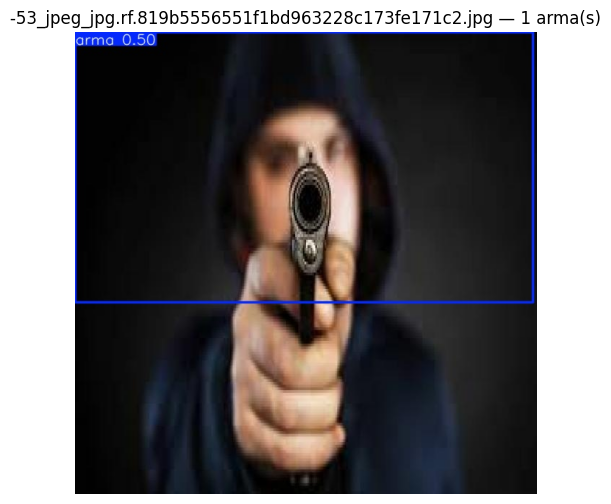


🔍 Procesando: -72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg

image 1/1 /content/dataset/valid/images/-72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg: 640x640 1 arma, 10.9ms
Speed: 2.7ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


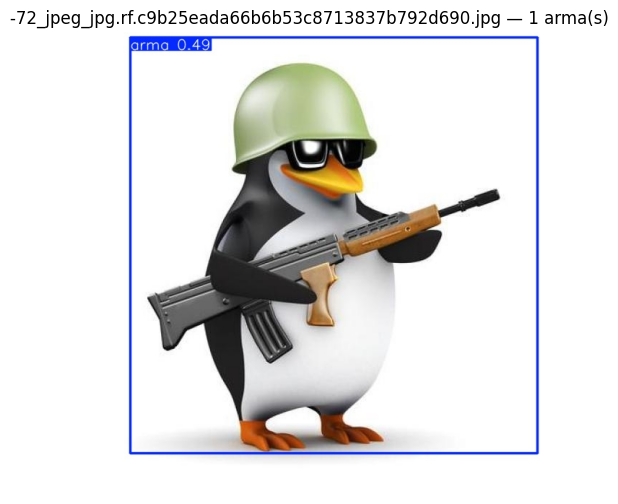


🔍 Procesando: -31_jpeg_jpg.rf.ae3937cdfb0601840310e33e2bdca4c9.jpg

image 1/1 /content/dataset/valid/images/-31_jpeg_jpg.rf.ae3937cdfb0601840310e33e2bdca4c9.jpg: 640x640 1 arma, 10.6ms
Speed: 2.9ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


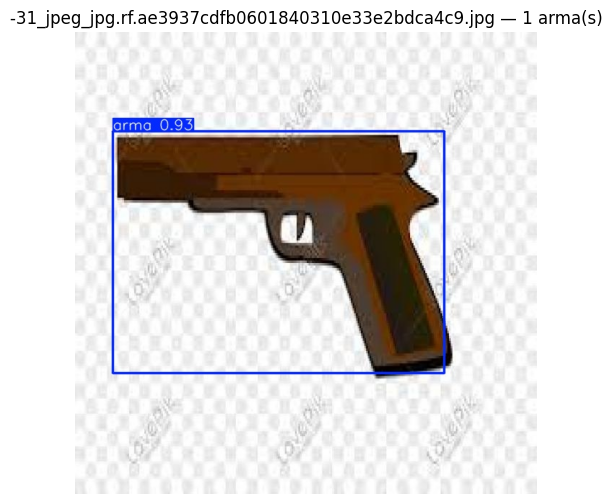


🔍 Procesando: -67_jpeg_jpg.rf.e02ba38097089b730e9576aad84085dd.jpg

image 1/1 /content/dataset/valid/images/-67_jpeg_jpg.rf.e02ba38097089b730e9576aad84085dd.jpg: 640x640 1 arma, 13.5ms
Speed: 2.9ms preprocess, 13.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


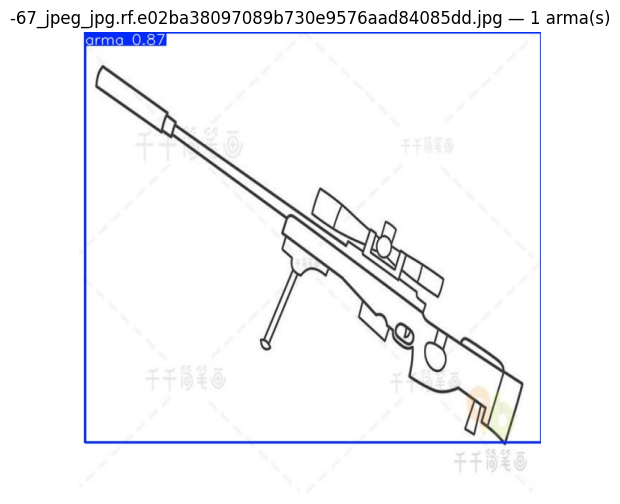


🔍 Procesando: -32_jpeg_jpg.rf.7320a90be0c7c8a807260fee6707dbcd.jpg

image 1/1 /content/dataset/valid/images/-32_jpeg_jpg.rf.7320a90be0c7c8a807260fee6707dbcd.jpg: 640x640 2 armas, 9.6ms
Speed: 2.6ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 2


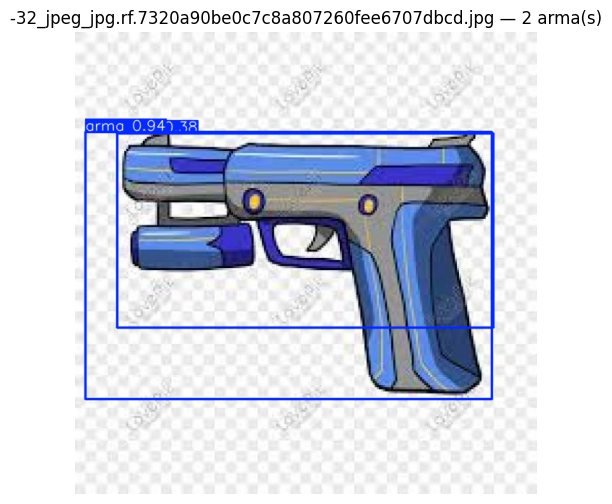


🔍 Procesando: -25_jpeg_jpg.rf.ebde3aa5723137f6830634199625f001.jpg

image 1/1 /content/dataset/valid/images/-25_jpeg_jpg.rf.ebde3aa5723137f6830634199625f001.jpg: 640x640 (no detections), 15.4ms
Speed: 2.4ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 0


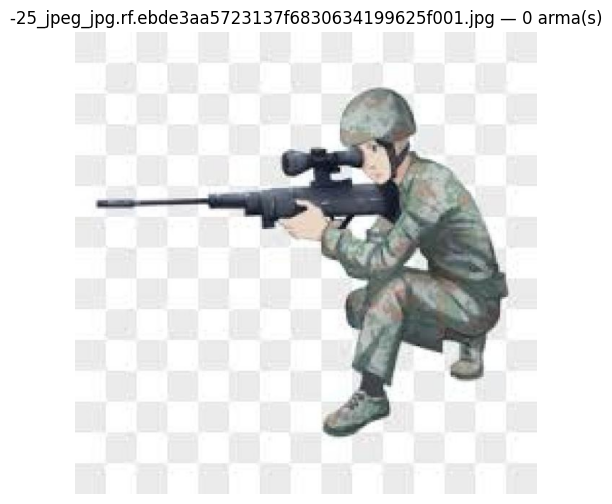


🔍 Procesando: -48_jpeg_jpg.rf.46175790a5aa0ca861b09f79c427bee7.jpg

image 1/1 /content/dataset/valid/images/-48_jpeg_jpg.rf.46175790a5aa0ca861b09f79c427bee7.jpg: 640x640 (no detections), 9.9ms
Speed: 2.6ms preprocess, 9.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 0


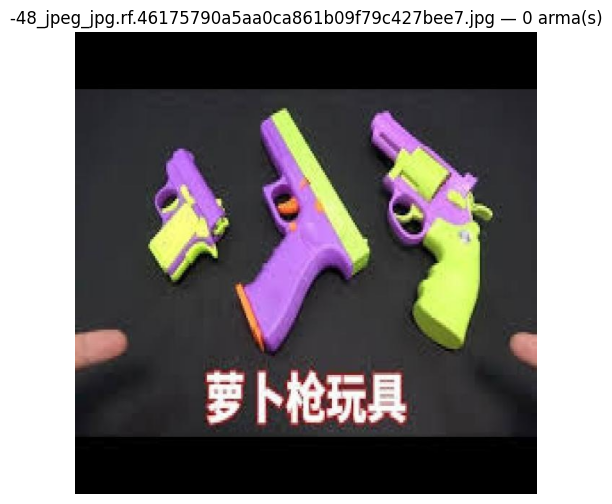


🔍 Procesando: -121_jpeg_jpg.rf.b72a8ff20b9a8ceff5e595e14c508b07.jpg

image 1/1 /content/dataset/valid/images/-121_jpeg_jpg.rf.b72a8ff20b9a8ceff5e595e14c508b07.jpg: 640x640 1 arma, 10.4ms
Speed: 2.6ms preprocess, 10.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


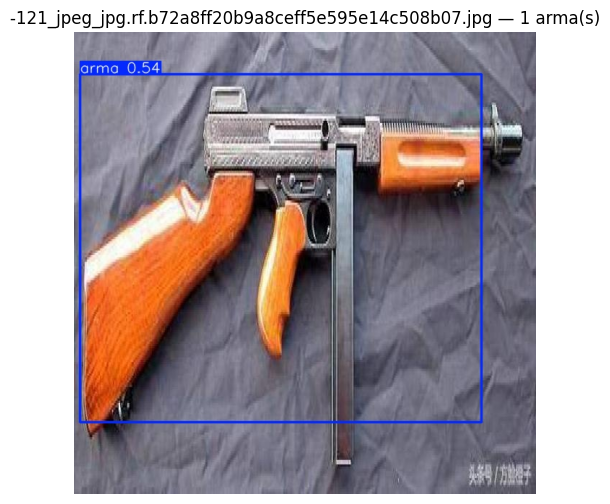


🔍 Procesando: -50_jpeg_jpg.rf.bcdf25864bea26c566dd9e8f25e2fb04.jpg

image 1/1 /content/dataset/valid/images/-50_jpeg_jpg.rf.bcdf25864bea26c566dd9e8f25e2fb04.jpg: 640x640 2 armas, 12.1ms
Speed: 2.6ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 2


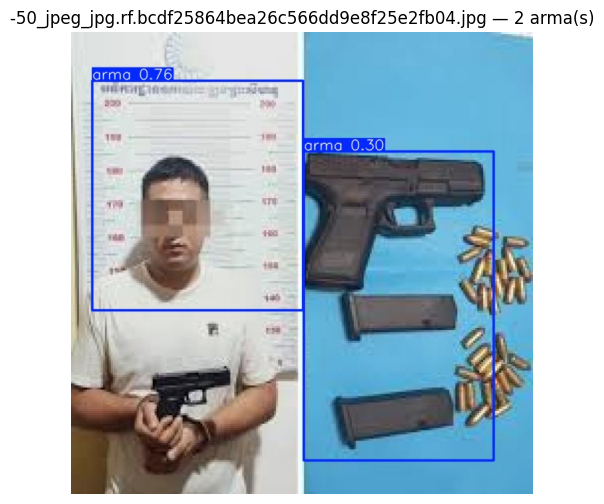


🔍 Procesando: -29_jpeg_jpg.rf.946864d865b9f4c544a92f13f91c8aaf.jpg

image 1/1 /content/dataset/valid/images/-29_jpeg_jpg.rf.946864d865b9f4c544a92f13f91c8aaf.jpg: 640x640 1 arma, 11.2ms
Speed: 2.6ms preprocess, 11.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


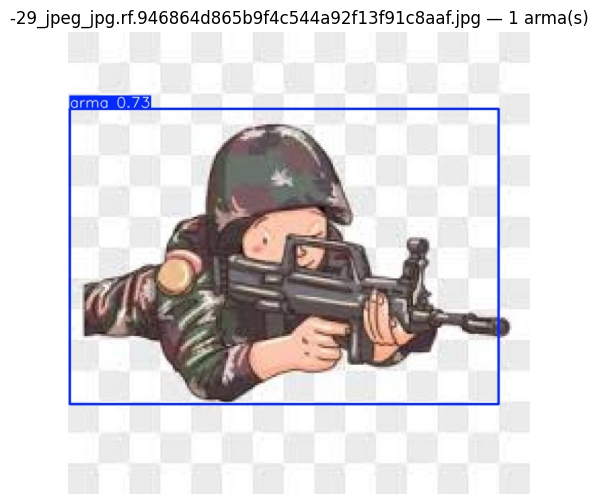

In [33]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os

# Ruta de imágenes de validación
image_paths = glob('/content/dataset/valid/images/*.jpg')

# Crear carpeta de resultados si no existe
os.makedirs('/content/resultados', exist_ok=True)

# Procesar imágenes
for path in image_paths[:10]:  # Puedes cambiar el número para ver más imágenes
    filename = os.path.basename(path)
    print(f"\n🔍 Procesando: {filename}")

    # Inferencia
    results = model(path)
    results[0].save(filename=f"/content/resultados/{filename}")

    # Conteo de armas detectadas
    num_armas = len(results[0].boxes)
    print(f"📦 Armas detectadas: {num_armas}")

    # Mostrar imagen resultante
    img = cv2.imread(f"/content/resultados/{filename}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{filename} — {num_armas} arma(s)")
    plt.show()


actualizacion notbook

In [12]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # Modelo base
model.train(data='/content/dataset/data.yaml', epochs=50, imgsz=640)

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

train: Scanning /content/dataset/train/labels.cache... 37 images, 20 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 477.0±334.9 MB/s, size: 43.5 KB)


val: Scanning /content/dataset/valid/labels.cache... 8 images, 8 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.14G      1.125      2.938       1.64         18        640: 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         16          9    0.00187          1     0.0618     0.0378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.14G     0.7963      2.737      1.353         18        640: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all         16          9    0.00187          1      0.501      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.14G     0.8231      2.266      1.394         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]

                   all         16          9    0.00187          1       0.43      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.14G     0.8915      2.277      1.402         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         16          9    0.00187          1      0.171      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.14G      0.817      2.003      1.352         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all         16          9    0.00167      0.889     0.0722     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.14G     0.8247      1.975      1.417         11        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]

                   all         16          9    0.00167      0.889      0.184      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.14G     0.8355      1.997       1.38         10        640: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.66it/s]

                   all         16          9    0.00187          1      0.405      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.14G      0.943      2.101      1.502         12        640: 100%|██████████| 4/4 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all         16          9    0.00265          1      0.598       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.14G     0.8547      1.806      1.348         17        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all         16          9    0.00256          1      0.462      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.14G     0.7883       1.93      1.339         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         16          9    0.00187          1      0.288      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.14G     0.8654      1.853      1.417         16        640: 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         16          9      0.797      0.437      0.636      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.14G     0.8711      1.813      1.397         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


                   all         16          9      0.736      0.556      0.618      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.14G     0.8326      1.903       1.39         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


                   all         16          9      0.517      0.556      0.619      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.14G     0.9919       1.88      1.471         13        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all         16          9      0.899      0.444      0.648       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.14G     0.8116       1.79      1.399         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         16          9       0.34      0.778      0.381      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.14G     0.7711      1.589      1.295         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         16          9      0.266      0.778      0.251      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.14G      0.804      1.619      1.363         21        640: 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         16          9      0.255      0.556      0.239      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.14G     0.7959      1.457      1.252         16        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         16          9      0.411      0.222      0.271     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.14G     0.8113      1.561      1.329         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         16          9      0.588       0.32      0.351      0.068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.14G     0.8557      1.559      1.407         20        640: 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         16          9      0.362      0.556      0.393      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.14G     0.8937      1.776      1.428         11        640: 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         16          9      0.324      0.778      0.302       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.14G     0.8292      1.527      1.381         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.33it/s]


                   all         16          9      0.253      0.667       0.25     0.0741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.14G     0.8476      1.619      1.349         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all         16          9      0.241      0.444      0.252     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.14G     0.7761       1.58      1.382         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.17it/s]

                   all         16          9      0.182      0.556      0.216     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.14G     0.8927      1.521      1.432         14        640: 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         16          9       0.47      0.444      0.342      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.14G     0.8559      1.536      1.422         13        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all         16          9      0.365       0.64      0.421      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.14G     0.8559      1.537      1.356         15        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         16          9      0.349      0.778      0.449      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.14G     0.9892      1.593      1.536         16        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all         16          9      0.382      0.556      0.357      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.14G     0.8629       1.39      1.318         18        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         16          9      0.227      0.393      0.201      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.14G     0.8256      1.493       1.35         19        640: 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         16          9      0.202      0.778      0.221     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.14G     0.7862      1.301      1.255         19        640: 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]

                   all         16          9      0.289      0.556      0.324      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.14G     0.7449      1.286      1.244         19        640: 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         16          9      0.407      0.556       0.38      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.14G     0.7224      1.253      1.298         18        640: 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all         16          9      0.287      0.667      0.337      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.14G     0.6448      1.247      1.264         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         16          9      0.276      0.667      0.272      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.14G     0.8063      1.322      1.341         11        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.19it/s]

                   all         16          9      0.238      0.778      0.279     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.14G     0.7446      1.238      1.266         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

                   all         16          9      0.146      0.444     0.0995     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.14G     0.7334      1.344       1.28          9        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all         16          9      0.228      0.593       0.18     0.0822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.14G     0.8208      1.297      1.336         17        640: 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         16          9      0.238      0.667      0.194     0.0986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.14G      0.823      1.377      1.344         14        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.27it/s]

                   all         16          9      0.377      0.556      0.277       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.14G        0.6       1.16      1.164         17        640: 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         16          9      0.375      0.556      0.312      0.155


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.14G     0.7373      2.225      1.416          4        640: 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         16          9       0.43      0.556      0.322      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.14G     0.5805      1.636      1.275          7        640: 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.30it/s]

                   all         16          9      0.604      0.556      0.357      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.14G     0.6371      1.569      1.317          6        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]

                   all         16          9      0.502      0.556      0.396      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.14G     0.5894      1.528      1.301          5        640: 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]

                   all         16          9      0.685      0.556      0.437      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.14G     0.5451      1.465      1.202          8        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]

                   all         16          9      0.675      0.556      0.438      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.14G     0.5407      1.472      1.239          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all         16          9      0.678      0.556      0.457      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.14G     0.5089      1.415      1.168          6        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.57it/s]

                   all         16          9      0.684      0.556      0.484      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.14G      0.614      1.416      1.261          5        640: 100%|██████████| 4/4 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]


                   all         16          9      0.686      0.556      0.525      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.14G     0.4664      1.334       1.14          8        640: 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         16          9      0.695      0.556      0.548      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.14G     0.4488      1.382      1.199          4        640: 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.04it/s]


                   all         16          9      0.706      0.556      0.554       0.42

50 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]


                   all         16          9      0.686      0.556      0.526      0.432
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb98e391e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [34]:
import pandas as pd

# Leer el archivo (ajustamos el nombre por si tiene espacios o paréntesis)
df = pd.read_csv('/content/atributos(Sheet1).csv')

# Mostrar las primeras filas para verificar
df.head()


filename   L   A  M1  M2  M3  C1  C2  C3  C4
0      arma1.jpg  25   5   1   0   0   1   0   0   0
1     fusil2.jpg  80  75   1   0   0   0   0   1   0
2  cuchillo3.jpg  12   8   1   0   1   0   0   0   1

In [35]:
# Función de clasificación personalizada
def clasificar_arma(row):
    L, A = row['L'], row['A']
    C1, C2, C3, C4 = row['C1'], row['C2'], row['C3'], row['C4']
    tipo = "Desconocido"
    peligro = "No definido"

    if C4 == 1:
        if A >= 15:
            tipo = "Machete"
        elif A <= 10:
            tipo = "Cuchillo"
        peligro = "Peligro Bajo"
    elif C1 == 1:
        if A >= 20 and L <= 30:
            tipo = "Pistola"
        peligro = "Peligro Bajo"
    elif C2 == 1:
        if 30 <= A <= 35:
            tipo = "Subfusil"
        elif A >= 40 and 40 <= L <= 60:
            tipo = "Carabina"
        elif A >= 15:
            tipo = "Machete"
        peligro = "Peligro Muy Alto"
    elif C3 == 1 and L > 75:
        if A > 70:
            tipo = "Francotirador"
        elif A <= 61 and A > 31:
            tipo = "Fusil de Asalto"
        elif A <= 61:
            tipo = "Fusil Tirador"
        peligro = "Peligro Alto"

    return pd.Series([tipo, peligro])

# Aplicar
df[['tipo_arma', 'nivel_peligro']] = df.apply(clasificar_arma, axis=1)

# Mostrar resultado
df.head()

filename   L   A  M1  M2  M3  C1  C2  C3  C4      tipo_arma  \
0      arma1.jpg  25   5   1   0   0   1   0   0   0    Desconocido   
1     fusil2.jpg  80  75   1   0   0   0   0   1   0  Francotirador   
2  cuchillo3.jpg  12   8   1   0   1   0   0   0   1       Cuchillo   

  nivel_peligro  
0  Peligro Bajo  
1  Peligro Alto  
2  Peligro Bajo

In [36]:
df.to_csv('/content/clasificacion_armas_final.csv', index=False)
print("✅ Clasificación completada. Archivo guardado como 'clasificacion_armas_final.csv'.")

✅ Clasificación completada. Archivo guardado como 'clasificacion_armas_final.csv'.


In [37]:
import os
os.makedirs('/content/resultados', exist_ok=True)


image 1/1 /content/dataset/valid/images/-25_jpeg_jpg.rf.ebde3aa5723137f6830634199625f001.jpg: 640x640 (no detections), 14.3ms
Speed: 3.0ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


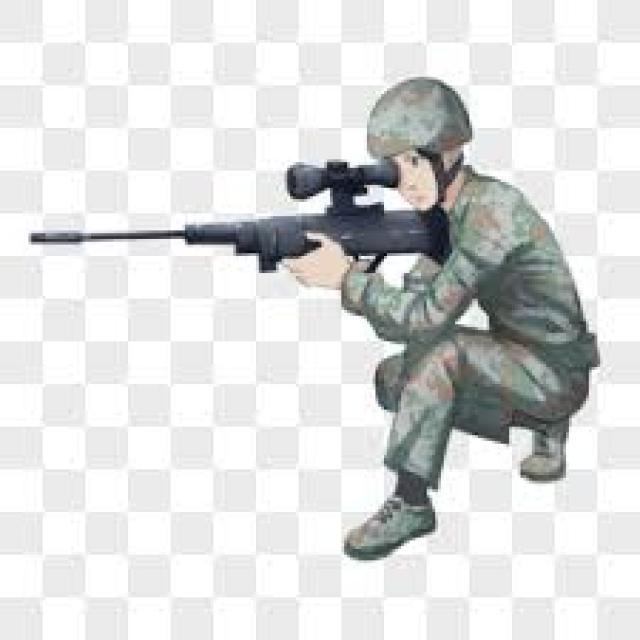

In [44]:
results = model('/content/dataset/valid/images/-25_jpeg_jpg.rf.ebde3aa5723137f6830634199625f001.jpg')

# Mostrar el resultado de la primera imagen de la lista
results[0].show()



🔍 Procesando: -53_jpeg_jpg.rf.819b5556551f1bd963228c173fe171c2.jpg

image 1/1 /content/dataset/valid/images/-53_jpeg_jpg.rf.819b5556551f1bd963228c173fe171c2.jpg: 640x640 1 arma, 10.7ms
Speed: 5.4ms preprocess, 10.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


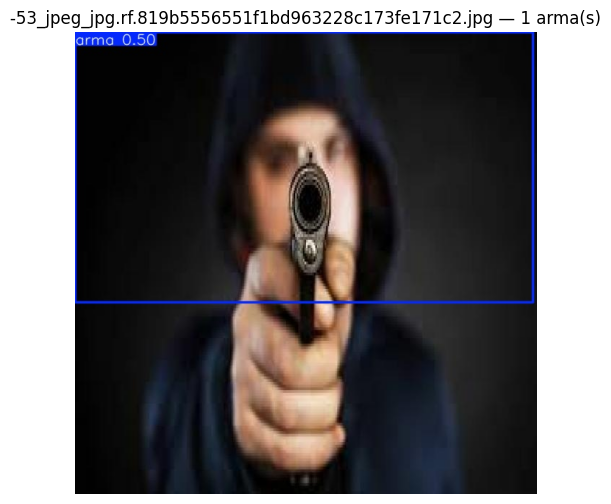


🔍 Procesando: -72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg

image 1/1 /content/dataset/valid/images/-72_jpeg_jpg.rf.c9b25eada66b6b53c8713837b792d690.jpg: 640x640 1 arma, 12.1ms
Speed: 4.2ms preprocess, 12.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


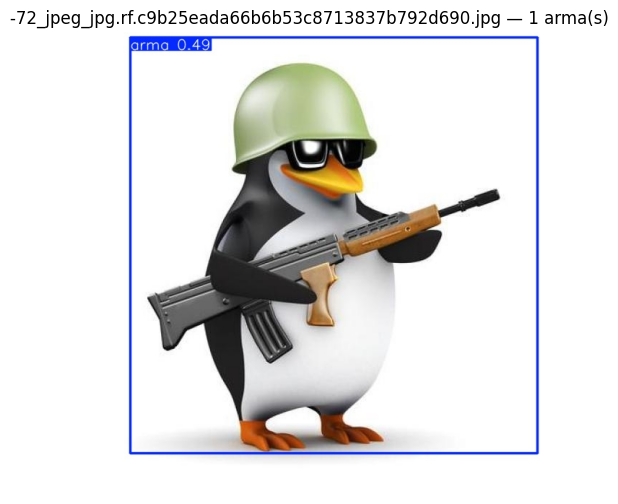


🔍 Procesando: -31_jpeg_jpg.rf.ae3937cdfb0601840310e33e2bdca4c9.jpg

image 1/1 /content/dataset/valid/images/-31_jpeg_jpg.rf.ae3937cdfb0601840310e33e2bdca4c9.jpg: 640x640 1 arma, 10.7ms
Speed: 2.5ms preprocess, 10.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


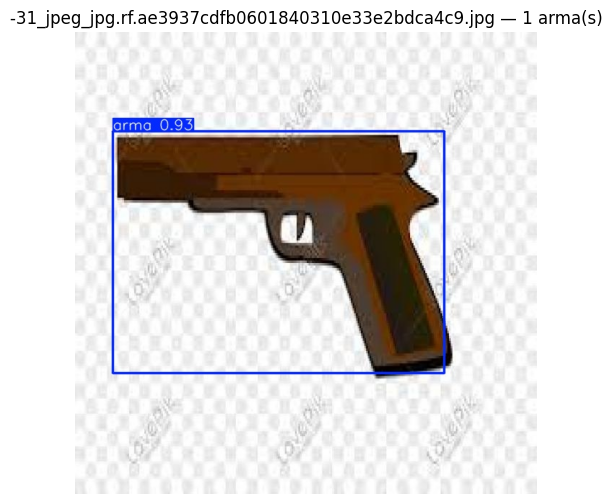


🔍 Procesando: -67_jpeg_jpg.rf.e02ba38097089b730e9576aad84085dd.jpg

image 1/1 /content/dataset/valid/images/-67_jpeg_jpg.rf.e02ba38097089b730e9576aad84085dd.jpg: 640x640 1 arma, 12.9ms
Speed: 3.3ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


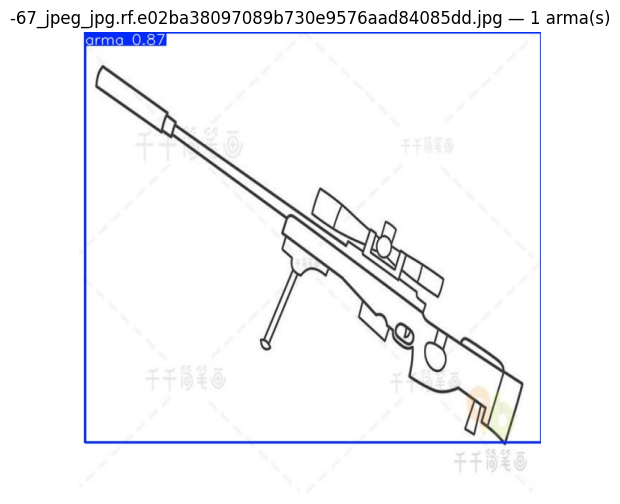


🔍 Procesando: -32_jpeg_jpg.rf.7320a90be0c7c8a807260fee6707dbcd.jpg

image 1/1 /content/dataset/valid/images/-32_jpeg_jpg.rf.7320a90be0c7c8a807260fee6707dbcd.jpg: 640x640 2 armas, 12.0ms
Speed: 2.5ms preprocess, 12.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 2


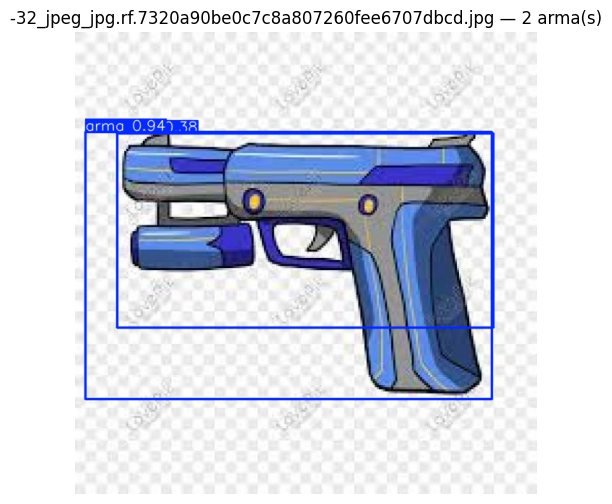


🔍 Procesando: -25_jpeg_jpg.rf.ebde3aa5723137f6830634199625f001.jpg

image 1/1 /content/dataset/valid/images/-25_jpeg_jpg.rf.ebde3aa5723137f6830634199625f001.jpg: 640x640 (no detections), 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 0


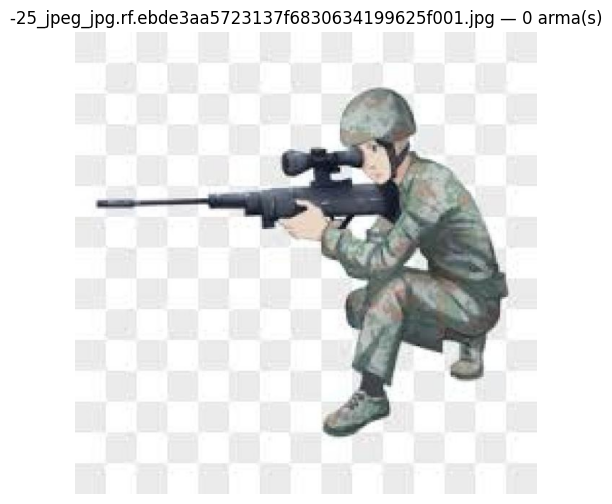


🔍 Procesando: -48_jpeg_jpg.rf.46175790a5aa0ca861b09f79c427bee7.jpg

image 1/1 /content/dataset/valid/images/-48_jpeg_jpg.rf.46175790a5aa0ca861b09f79c427bee7.jpg: 640x640 (no detections), 9.3ms
Speed: 4.0ms preprocess, 9.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 0


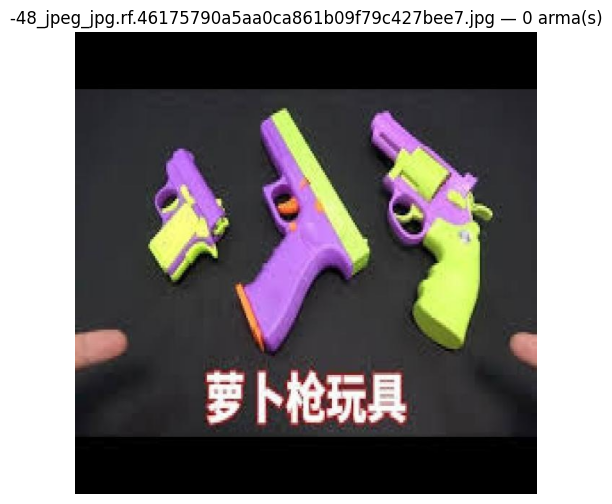


🔍 Procesando: -121_jpeg_jpg.rf.b72a8ff20b9a8ceff5e595e14c508b07.jpg

image 1/1 /content/dataset/valid/images/-121_jpeg_jpg.rf.b72a8ff20b9a8ceff5e595e14c508b07.jpg: 640x640 1 arma, 9.6ms
Speed: 3.8ms preprocess, 9.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


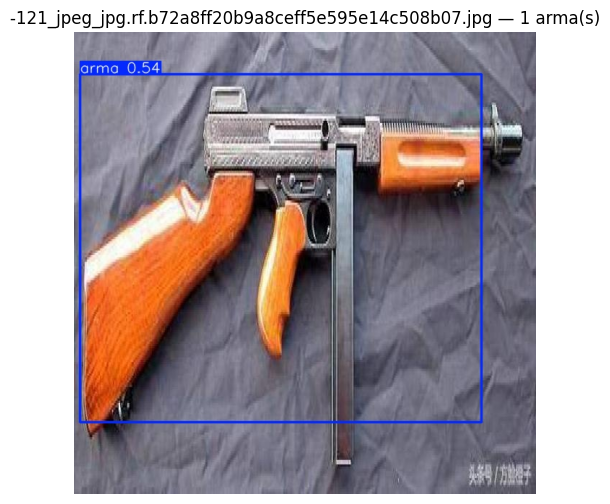


🔍 Procesando: -50_jpeg_jpg.rf.bcdf25864bea26c566dd9e8f25e2fb04.jpg

image 1/1 /content/dataset/valid/images/-50_jpeg_jpg.rf.bcdf25864bea26c566dd9e8f25e2fb04.jpg: 640x640 2 armas, 9.2ms
Speed: 7.4ms preprocess, 9.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 2


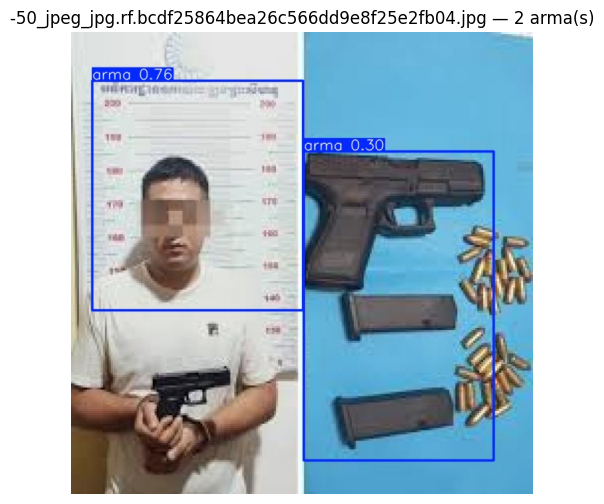


🔍 Procesando: -29_jpeg_jpg.rf.946864d865b9f4c544a92f13f91c8aaf.jpg

image 1/1 /content/dataset/valid/images/-29_jpeg_jpg.rf.946864d865b9f4c544a92f13f91c8aaf.jpg: 640x640 1 arma, 12.4ms
Speed: 2.6ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
📦 Armas detectadas: 1


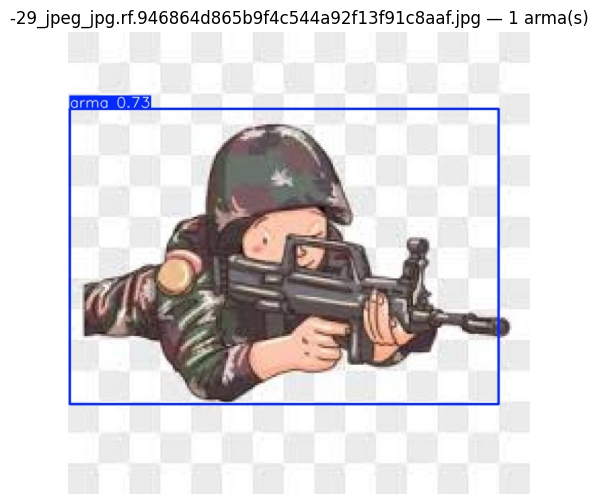


✅ Archivo 'detecciones_armas.csv' guardado con el conteo de armas.


In [45]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import pandas as pd

# Carpeta de imágenes
image_paths = glob('/content/dataset/valid/images/*.jpg')

# Crear carpeta para guardar resultados visuales
os.makedirs('/content/resultados', exist_ok=True)

# Lista para guardar los resultados
registro = []

# Procesar imágenes
for path in image_paths[:10]:  # Cambia el rango si deseas procesar más
    filename = os.path.basename(path)
    print(f"\n🔍 Procesando: {filename}")

    # Inferencia
    results = model(path)
    results[0].save(filename=f"/content/resultados/{filename}")

    # Conteo de armas
    num_armas = len(results[0].boxes)
    print(f"📦 Armas detectadas: {num_armas}")

    # Guardar en registro
    registro.append({'imagen': filename, 'armas_detectadas': num_armas})

    # Mostrar imagen
    img = cv2.imread(f"/content/resultados/{filename}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{filename} — {num_armas} arma(s)")
    plt.show()

# Crear DataFrame y guardar como CSV
df_resultados = pd.DataFrame(registro)
df_resultados.to_csv('/content/detecciones_armas.csv', index=False)
print("\n✅ Archivo 'detecciones_armas.csv' guardado con el conteo de armas.")


Medelo mas grande

**entrenar desde cero **


In [ ]:
from ultralytics import YOLO

# Cargar modelo YOLOv8 Small (más preciso que nano)
model = YOLO('yolov8s.pt')

# Entrenar el modelo con más resolución, más épocas y aumentación de datos
model.train(
    data='/content/dataset/data.yaml',  # Ruta al archivo YAML
    epochs=200,                         # Más épocas para mejor aprendizaje
    imgsz=960,                          # Imágenes más grandes (más detalle)
    batch=8,                            # Tamaño de lote (ajústalo si tienes errores de memoria)
    augment=True,                       # Aumentación de datos activada
    name='arma_preciso_v1'              # Nombre del experimento (carpeta)
)


In [ ]:
model.val()


In [ ]:
!pip install python-docx
!apt install -y libreoffice


In [ ]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import shutil

# Crear documento
doc = Document()
doc.add_heading('📊 Reporte de Entrenamiento, Detección y Clasificación de Armas', 0)

# 🔹 1. Gráficas de entrenamiento
doc.add_heading('1. Gráficas de Entrenamiento', level=1)
doc.add_paragraph("Resultados del entrenamiento del modelo YOLOv8s con 200 épocas y resolución 960px.")

graficas = [
    '/content/runs/detect/arma_preciso_v1/results.png',
    '/content/runs/detect/arma_preciso_v1/confusion_matrix.png',
    '/content/runs/detect/arma_preciso_v1/F1_curve.png'
]

for path in graficas:
    try:
        doc.add_picture(path, width=Inches(5.5))
        doc.add_paragraph(path.split("/")[-1].replace(".png", "").replace("_", " ").title(), style='Caption')
    except:
        doc.add_paragraph(f"⚠️ No se pudo cargar: {path}")

# 🔹 2. Conteo de armas detectadas
doc.add_heading('2. Conteo de Armas Detectadas en Validación', level=1)
df_det = pd.read_csv('/content/detecciones_armas.csv')

# Tabla de conteo
table = doc.add_table(rows=1, cols=2)
table.style = 'Table Grid'
hdr = table.rows[0].cells
hdr[0].text = 'Imagen'
hdr[1].text = 'Armas Detectadas'

for _, row in df_det.iterrows():
    r = table.add_row().cells
    r[0].text = row['imagen']
    r[1].text = str(row['armas_detectadas'])

# 🔹 3. Clasificación por tipo de arma y nivel de peligro
doc.add_heading('3. Clasificación de Armas por Atributos', level=1)
df_clas = pd.read_csv('/content/clasificacion_armas_final.csv')

# Tabla de clasificación
table2 = doc.add_table(rows=1, cols=3)
table2.style = 'Table Grid'
hdr2 = table2.rows[0].cells
hdr2[0].text = 'Imagen'
hdr2[1].text = 'Tipo de Arma'
hdr2[2].text = 'Nivel de Peligro'

for _, row in df_clas.iterrows():
    r = table2.add_row().cells
    r[0].text = row['filename']
    r[1].text = row['tipo_arma']
    r[2].text = row['nivel_peligro']

# Guardar el documento
doc_path = '/content/Reporte_Armas_IA.docx'
doc.save(doc_path)
print(f"✅ Reporte Word generado: {doc_path}")



In [ ]:
!libreoffice --headless --convert-to pdf /content/Reporte_Entrenamiento_Armas.docx --outdir /content/


In [ ]:
from google.colab import files
files.download("/content/Reporte_Entrenamiento_Armas.docx")
